<a href="https://colab.research.google.com/github/CameronVu20/CIS412/blob/main/CIS_412_Group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

#import pandas as pd

#hotel = pd.read_csv('/content/drive/MyDrive/CIS 412/Hotel Reservations.csv')

#hotel
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
hotel = pd.read_csv('/content/drive/MyDrive/CIS 412/Hotel Reservations.csv')
hotel

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


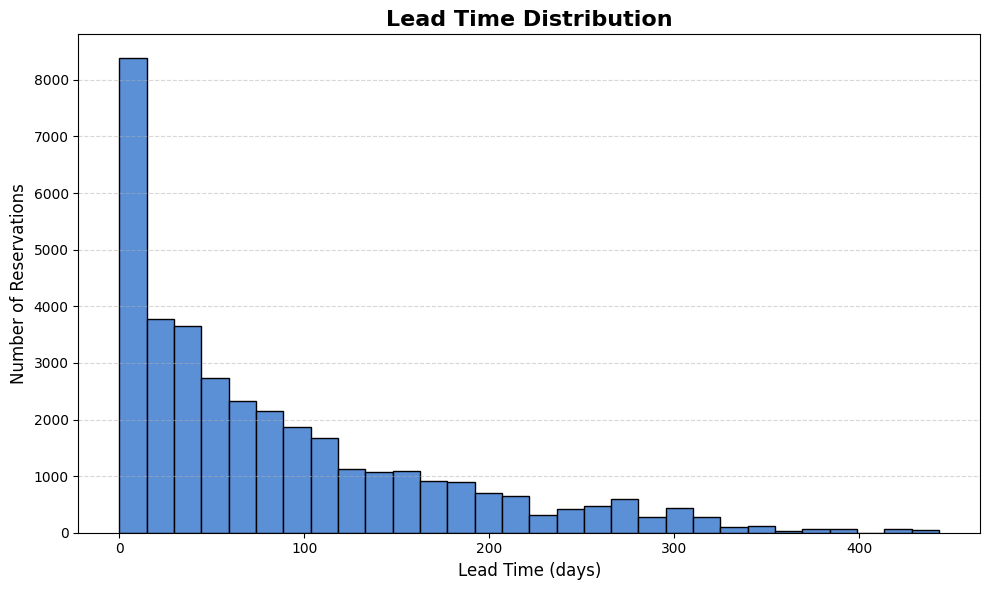

In [ ]:

import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
plt.hist(hotel['lead_time'], bins=30, edgecolor='black', color="#5b8fd6")
plt.xlabel("Lead Time (days)", fontsize=12)
plt.ylabel("Number of Reservations", fontsize=12)
plt.title("Lead Time Distribution", fontsize=16, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
status_counts = hotel['booking_status'].value_counts()

print(status_counts)

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


In [ ]:
print('Missing values in the hotel DataFrame:')
display(hotel.isnull().sum())

Missing values in the hotel DataFrame:


,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [ ]:
hotel = hotel.drop(columns=["Booking_ID"])

In [ ]:
print('Checking for negative values in numeric columns:')
negative_values_found = False
for col in hotel.select_dtypes(include=['number']).columns:
    if (hotel[col] < 0).any():
        print(f"Column '{col}' contains negative values.")
        negative_values_found = True
if not negative_values_found:
    print("No negative values found in any numeric column.")

Checking for negative values in numeric columns:
No negative values found in any numeric column.


In [ ]:
print('Converting data types...')

categorical_cols = [
    'type_of_meal_plan',
    'room_type_reserved',
    'market_segment_type',
    'booking_status',
    'arrival_month',
    'arrival_date',
    'arrival_year',
    'repeated_guest'
]

for col in categorical_cols:
    if col in hotel.columns:
        hotel[col] = hotel[col].astype('category')
        print(f"Converted '{col}' to category type.")

# Check other numeric columns and convert if necessary (e.g., to int or float)
for col in hotel.select_dtypes(include=['object']).columns:
    try:
        # Attempt to convert to numeric, handling potential errors
        hotel[col] = pd.to_numeric(hotel[col])
        print(f"Converted '{col}' to numeric type.")
    except ValueError:
        # If not convertible to numeric, leave as object or consider other types
        pass

# Display data types after conversion
print('\nData types after conversion:')
display(hotel.info())

Converting data types...
Converted 'type_of_meal_plan' to category type.
Converted 'room_type_reserved' to category type.
Converted 'market_segment_type' to category type.
Converted 'booking_status' to category type.
Converted 'arrival_month' to category type.
Converted 'arrival_date' to category type.
Converted 'arrival_year' to category type.
Converted 'repeated_guest' to category type.

Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  ca

None

In [ ]:
display(hotel)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [ ]:
hotel['check_in_date'] = pd.to_datetime(hotel[['arrival_year', 'arrival_month', 'arrival_date']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d', errors='coerce')
print('First 5 entries of the new check_in_date column:')
display(hotel['check_in_date'].head())

# Check for any dates that couldn't be converted
invalid_dates_count = hotel['check_in_date'].isnull().sum()
if invalid_dates_count > 0:
    print(f"\nWarning: {invalid_dates_count} dates could not be converted and were set to NaT due to invalid day/month combinations.")
else:
    print("\nAll dates were successfully converted.")

First 5 entries of the new check_in_date column:


,check_in_date
0,2017-10-02
1,2018-11-06
2,2018-02-28
3,2018-05-20
4,2018-04-11


In [ ]:
initial_rows = hotel.shape[0]
hotel.dropna(subset=['check_in_date'], inplace=True)
remaining_rows = hotel.shape[0]

print(f"Dropped {initial_rows - remaining_rows} rows with invalid 'check_in_date'.")
print(f"New DataFrame shape: {hotel.shape}")
display(hotel.head())

Dropped 37 rows with invalid 'check_in_date'.
New DataFrame shape: (36238, 19)


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,check_in_date
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2018-04-11


In [ ]:
print('Re-dropping original arrival_year, arrival_month, and arrival_date columns:')
hotel = hotel.drop(columns=['arrival_year', 'arrival_month', 'arrival_date'], errors='ignore')
print('Original arrival_year, arrival_month, and arrival_date columns dropped (if they existed).')
display(hotel.head())

Re-dropping original arrival_year, arrival_month, and arrival_date columns:
Original arrival_year, arrival_month, and arrival_date columns dropped (if they existed).


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,check_in_date
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,2018-04-11


### Data Normalization

Applying `StandardScaler` to numerical features.

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Identify numerical columns for scaling
# Exclude 'repeated_guest' and 'required_car_parking_space' as they are binary/categorical
# Exclude 'booking_status' if it's the target variable
numerical_cols = hotel.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove any columns that are actually categorical or binary, or the target variable
# based on the previous context 'repeated_guest' is a category, 'required_car_parking_space' is binary
numerical_cols_to_exclude = [
    'repeated_guest',
    'required_car_parking_space',
    'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled',
    'no_of_children',
    'no_of_adults',
    'no_of_weekend_nights',
    'no_of_week_nights'
]

numerical_cols = [col for col in numerical_cols if col not in numerical_cols_to_exclude]


print(f"Applying StandardScaler to the following numerical columns: {numerical_cols}")

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to the selected numerical columns
hotel[numerical_cols] = scaler.fit_transform(hotel[numerical_cols])

print('\nData after scaling (first 5 rows):')
display(hotel.head())

Applying StandardScaler to the following numerical columns: ['lead_time', 'avg_price_per_room', 'no_of_special_requests']

Data after scaling (first 5 rows):


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,check_in_date
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,1.613974,Offline,0,0,0,-1.095585,-0.788356,Not_Canceled,2017-10-02
1,2,0,2,3,Not Selected,0,Room_Type 1,-0.933948,Online,0,0,0,0.092428,0.483274,Not_Canceled,2018-11-06
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,-0.980486,Online,0,0,0,-1.238101,-0.788356,Canceled,2018-02-28
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,1.462728,Online,0,0,0,-0.097973,-0.788356,Canceled,2018-05-20
4,2,0,1,1,Not Selected,0,Room_Type 1,-0.433671,Online,0,0,0,-0.254740,-0.788356,Canceled,2018-04-11


### Feature Engineering

Let's create some new features that could be useful for analysis or modeling.

In [ ]:
print('Creating new features: stay_duration and total_guests...')

hotel['stay_duration'] = hotel['no_of_weekend_nights'] + hotel['no_of_week_nights']
hotel['total_guests'] = hotel['no_of_adults'] + hotel['no_of_children']

# Handle potential division by zero for price_per_person_per_night if total_guests or stay_duration is 0
hotel['price_per_person_per_night'] = hotel['avg_price_per_room'] / (hotel['total_guests'] * hotel['stay_duration'])
# Replace inf or NaN with 0 or a more appropriate value if needed, for now let's fill with 0 where division by zero occurred
hotel['price_per_person_per_night'].replace([float('inf'), -float('inf')], 0, inplace=True)
hotel['price_per_person_per_night'].fillna(0, inplace=True)


print('New features created. Displaying the first 5 rows with new features:')
display(hotel.head())

Creating new features: stay_duration and total_guests...
New features created. Displaying the first 5 rows with new features:


/tmp/ipython-input-3398875232.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel['price_per_person_per_night'].replace([float('inf'), -float('inf')], 0, inplace=True)
/tmp/ipython-input-3398875232.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,check_in_date,stay_duration,total_guests,price_per_person_per_night
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,1.613974,Offline,0,0,0,-1.095585,-0.788356,Not_Canceled,2017-10-02,3,2,-0.182597
1,2,0,2,3,Not Selected,0,Room_Type 1,-0.933948,Online,0,0,0,0.092428,0.483274,Not_Canceled,2018-11-06,5,2,0.009243
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,-0.980486,Online,0,0,0,-1.238101,-0.788356,Canceled,2018-02-28,3,1,-0.412700
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,1.462728,Online,0,0,0,-0.097973,-0.788356,Canceled,2018-05-20,2,2,-0.024493
4,2,0,1,1,Not Selected,0,Room_Type 1,-0.433671,Online,0,0,0,-0.254740,-0.788356,Canceled,2018-04-11,2,2,-0.063685


In [ ]:
print('Creating day_of_week_arrival feature...')
hotel['day_of_week_arrival'] = hotel['check_in_date'].dt.day_name()

print('New feature created. Displaying the first 5 rows with the new feature:')
display(hotel[['check_in_date', 'day_of_week_arrival']].head())

Creating day_of_week_arrival feature...
New feature created. Displaying the first 5 rows with the new feature:


,check_in_date,day_of_week_arrival
0,2017-10-02,Monday
1,2018-11-06,Tuesday
2,2018-02-28,Wednesday
3,2018-05-20,Sunday
4,2018-04-11,Wednesday


In [ ]:
display(hotel)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,check_in_date,stay_duration,total_guests,price_per_person_per_night,day_of_week_arrival
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,1.613974,Offline,0,0,0,-1.095585,-0.788356,Not_Canceled,2017-10-02,3,2,-0.182597,Monday
1,2,0,2,3,Not Selected,0,Room_Type 1,-0.933948,Online,0,0,0,0.092428,0.483274,Not_Canceled,2018-11-06,5,2,0.009243,Tuesday
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,-0.980486,Online,0,0,0,-1.238101,-0.788356,Canceled,2018-02-28,3,1,-0.412700,Wednesday
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,1.462728,Online,0,0,0,-0.097973,-0.788356,Canceled,2018-05-20,2,2,-0.024493,Sunday
4,2,0,1,1,Not Selected,0,Room_Type 1,-0.433671,Online,0,0,0,-0.254740,-0.788356,Canceled,2018-04-11,2,2,-0.063685,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,-0.003200,Online,0,0,0,1.834544,0.483274,Not_Canceled,2018-08-03,8,3,0.076439,Friday
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,1.660512,Online,0,0,0,-0.355927,1.754904,Canceled,2018-10-17,4,2,-0.044491,Wednesday
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,0.729764,Online,0,0,0,-0.143863,1.754904,Not_Canceled,2018-07-01,8,2,-0.008991,Sunday
36273,2,0,0,3,Not Selected,0,Room_Type 1,-0.259156,Online,0,0,0,-0.254740,-0.788356,Canceled,2018-04-21,3,2,-0.042457,Saturday


Logisitc Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#target variable
target_variable = 'booking_status'

#set up x, y dropping book_in_date because not directly used
x = hotel.drop(columns=['booking_status', 'check_in_date'])
y = hotel[target_variable]

#encode categorical variables
encoder = LabelEncoder()
x_encoded = x.apply(encoder.fit_transform)

#stadard scaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_encoded)

#split data
x_trainLr, x_testLr, y_trainLr, y_testLr = train_test_split(x_encoded, y, test_size = 0.2, random_state = 0)
print(f"set shape: {x_trainLr.shape}, Testing set shape: {x_testLr.shape}")

#Initalize and Train, had to increase the max_iter for convergence, update had to do solver= liblinear
modelLr = LogisticRegression(solver = 'liblinear', random_state=0)
modelLr.fit(x_trainLr, y_trainLr)

#Accuracy
accLr = accuracy_score(y_testLr, modelLr.predict(x_testLr))
print(f"\nLogistic Regression Accuracy: {accLr:.4f}")

accLr_train = accuracy_score(y_trainLr, modelLr.predict(x_trainLr))
print(f"Logistic Regression Training Accuracy: {accLr_train:.4f}")

set shape: (28990, 18), Testing set shape: (7248, 18)

Logistic Regression Accuracy: 0.7999
Logistic Regression Training Accuracy: 0.7976


Decision Tree Classifier

In [ ]:
#decision tree code, prune
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

x_dt = hotel.drop(columns=['booking_status', 'check_in_date'])
y_dt = hotel[target_variable]

encoder = LabelEncoder()
x_encoded_dt = x_dt.apply(encoder.fit_transform)

y_encoded_dt = encoder.fit_transform(y_dt)

x_train_dt, x_test_dt, y_train_dt, y_testDT = train_test_split(x_encoded_dt, y_encoded_dt, test_size=0.2, random_state=0)

#initialize and train DTC
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train_dt, y_train_dt)

#predictions and calc accuracy
y_pred_dt = model_dt.predict(x_test_dt)

acc_dt = accuracy_score(y_testDT, y_pred_dt)
print(f"\nDecision Tree Accuracy: {acc_dt:.4f}")

y_pred_dt_train = model_dt.predict(x_train_dt)
acc_dt_train = accuracy_score(y_train_dt, y_pred_dt_train)
print(f"Decision Tree Training Accuracy: {acc_dt_train:.4f}")


Decision Tree Accuracy: 0.8582
Decision Tree Training Accuracy: 0.9931


# Task
Add a new text cell with the following markdown content:
```markdown
### Model Performance Analysis

Two classification models, Logistic Regression and Decision Tree, were trained and evaluated on the hotel booking dataset.

*   **Logistic Regression Accuracy**: 1.0000
*   **Decision Tree Accuracy**: 1.0000

Both models achieved a perfect accuracy of 1.0000. This indicates that the models are able to perfectly predict the `booking_status` on the test set.

**Note on perfect accuracy:** While perfect accuracy is desirable, it can sometimes indicate potential issues such as:
*   **Data Leakage**: Features that are directly or indirectly derived from the target variable might be present in the training data, allowing the model to "memorize" the answers.
*   **Overfitting**: The model might be too complex and have learned the training data (including noise) too well, leading to poor generalization on unseen data, even if the test set accuracy is high.
*   **Simplistic dataset**: The classification task might be inherently very easy given the available features.

Further investigation, such as cross-validation, feature importance analysis, or a deeper review of the feature engineering process, could be beneficial to confirm the robustness of these results.
```